In [1]:
import pandas as pd
from datetime import datetime
import numpy as np

In [2]:
industry_metrics = pd.read_csv("https://www1.nyc.gov/assets/tlc/downloads/csv/data_reports_monthly.csv")

In [3]:
industry_metrics

,Month/Year,License Class,Trips Per Day,Farebox Per Day,Unique Drivers,Unique Vehicles,Vehicles Per Day,Avg Days Vehicles on Road,Avg Hours Per Day Per Vehicle,Avg Days Drivers on Road,Avg Hours Per Day Per Driver,Avg Minutes Per Trip,Percent of Trips Paid with Credit Card,Trips Per Day Shared
0,2023-01,Green,"2,199","43,733",960,911,488,16.6,3.5,16.1,3.5,13.8,66%,-
1,2023-01,FHV - High Volume,"596,095",-,"77,641","74,553","50,996",21.2,6.4,20.7,6.3,18,-,"9,998"
2,2023-01,FHV - Black Car,"15,978",-,"7,197","6,809","2,877",13.1,4.3,12.8,4.2,25,-,-
3,2023-01,FHV - Livery,"18,853",-,"4,778","4,614","2,791",18.8,4.9,18.5,4.8,18,-,-
4,2023-01,FHV - Lux Limo,"1,060",-,"1,501","1,468",532,11.3,2.0,11.3,1.9,63,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,2010-05,Yellow,"499,374","5,561,218","30,950","13,309","12,729",29.6,14.8,22.7,8.3,-,35%,-
655,2010-04,Yellow,"504,798","5,502,545","30,827","13,326","12,856",28.9,14.8,22.3,8.3,-,35%,-
656,2010-03,Yellow,"415,567","3,011,750","28,709","12,183","10,382",26.4,15.1,20.4,8.3,11.5,35%,-
657,2010-02,Yellow,"397,969","3,392,416","28,255","12,171","10,045",23.1,14.6,17.6,8.3,11.1,35%,-


Convert column names to lowercase

In [4]:
industry_metrics.columns = industry_metrics.columns.str.lower()
industry_metrics.columns

Index(['month/year', 'license class',
       '               trips per day               ',
       '               farebox per day               ',
       '                unique drivers                ',
       '                unique vehicles                ',
       '                vehicles per day                ',
       '           avg days vehicles on road           ',
       '           avg hours per day per vehicle           ',
       '           avg days drivers on road           ',
       '           avg hours per day per driver           ',
       '           avg minutes per trip           ',
       'percent of trips paid with credit card', ' trips per day shared '],
      dtype='object')

In [5]:
industry_metrics.columns = [col.strip() for col in industry_metrics.columns]

In [6]:
industry_metrics.columns

Index(['month/year', 'license class', 'trips per day', 'farebox per day',
       'unique drivers', 'unique vehicles', 'vehicles per day',
       'avg days vehicles on road', 'avg hours per day per vehicle',
       'avg days drivers on road', 'avg hours per day per driver',
       'avg minutes per trip', 'percent of trips paid with credit card',
       'trips per day shared'],
      dtype='object')

In [7]:
industry_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   month/year                              659 non-null    object 
 1   license class                           659 non-null    object 
 2   trips per day                           659 non-null    object 
 3   farebox per day                         655 non-null    object 
 4   unique drivers                          659 non-null    object 
 5   unique vehicles                         659 non-null    object 
 6   vehicles per day                        659 non-null    object 
 7   avg days vehicles on road               659 non-null    float64
 8   avg hours per day per vehicle           659 non-null    float64
 9   avg days drivers on road                659 non-null    float64
 10  avg hours per day per driver            659 non-null    float6

Remove "%" and Convert percent_of_trips_paid_with_credit_card to numeric

In [8]:

industry_metrics['percent of trips paid with credit card'] = industry_metrics['percent of trips paid with credit card'].replace({'%': '','-':''}, regex=True) #.astype(float)
industry_metrics['percent of trips paid with credit card'] = pd.to_numeric(industry_metrics['percent of trips paid with credit card'], errors='coerce') / 100
industry_metrics['percent of trips paid with credit card'] = industry_metrics['percent of trips paid with credit card'].fillna(0.0)
industry_metrics['percent of trips paid with credit card']

0      0.66
1      0.00
2      0.00
3      0.00
4      0.00
       ... 
654    0.35
655    0.35
656    0.35
657    0.35
658    0.32
Name: percent of trips paid with credit card, Length: 659, dtype: float64

Create month_year and drop month/year column

In [9]:
industry_metrics["date"] = pd.to_datetime(industry_metrics["month/year"], format="%Y/%m").dt.strftime('%Y-%m')
industry_metrics.drop(columns=["month/year"], inplace=True)
industry_metrics["date"]

0      2023-01
1      2023-01
2      2023-01
3      2023-01
4      2023-01
        ...   
654    2010-05
655    2010-04
656    2010-03
657    2010-02
658    2010-01
Name: date, Length: 659, dtype: object

convert columns to numeric

In [10]:
industry_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   license class                           659 non-null    object 
 1   trips per day                           659 non-null    object 
 2   farebox per day                         655 non-null    object 
 3   unique drivers                          659 non-null    object 
 4   unique vehicles                         659 non-null    object 
 5   vehicles per day                        659 non-null    object 
 6   avg days vehicles on road               659 non-null    float64
 7   avg hours per day per vehicle           659 non-null    float64
 8   avg days drivers on road                659 non-null    float64
 9   avg hours per day per driver            659 non-null    float64
 10  avg minutes per trip                    659 non-null    object

In [11]:
industry_metrics.columns

Index(['license class', 'trips per day', 'farebox per day', 'unique drivers',
       'unique vehicles', 'vehicles per day', 'avg days vehicles on road',
       'avg hours per day per vehicle', 'avg days drivers on road',
       'avg hours per day per driver', 'avg minutes per trip',
       'percent of trips paid with credit card', 'trips per day shared',
       'date'],
      dtype='object')

In [12]:
industry_metrics['trips per day'] = industry_metrics['trips per day'].apply(lambda x: x.strip().replace(',', '')).astype(int)
industry_metrics['trips per day']

0        2199
1      596095
2       15978
3       18853
4        1060
        ...  
654    499374
655    504798
656    415567
657    397969
658    479376
Name: trips per day, Length: 659, dtype: int64

In [13]:
industry_metrics.head()

,license class,trips per day,farebox per day,unique drivers,unique vehicles,vehicles per day,avg days vehicles on road,avg hours per day per vehicle,avg days drivers on road,avg hours per day per driver,avg minutes per trip,percent of trips paid with credit card,trips per day shared,date
0,Green,2199,"43,733",960,911,488,16.6,3.5,16.1,3.5,13.8,0.66,-,2023-01
1,FHV - High Volume,596095,-,"77,641","74,553","50,996",21.2,6.4,20.7,6.3,18,0.00,"9,998",2023-01
2,FHV - Black Car,15978,-,"7,197","6,809","2,877",13.1,4.3,12.8,4.2,25,0.00,-,2023-01
3,FHV - Livery,18853,-,"4,778","4,614","2,791",18.8,4.9,18.5,4.8,18,0.00,-,2023-01
4,FHV - Lux Limo,1060,-,"1,501","1,468",532,11.3,2.0,11.3,1.9,63,0.00,-,2023-01


In [14]:
industry_metrics['farebox per day'].unique()

array([' 43,733 ', ' - ', ' 2,335,375 ', '45,208', '2,358,924', '35,984',
       '2,088,897', '  -  ', '2,293,014', '39,960', '   -   ',
       '2,100,507', '43,814', '    -    ', '38,915', '1,918,370',
       '     -     ', '1,921,789', '37,356', '2,057,705', '44,572',
       '44,850', '2,234,977', '        -        ', '         -         ',
       '2,219,127', '43,591', '          -           ', '42,436',
       '2,097,334', '40,475', '          -          ', '1,805,865',
       '1,330,596', '           -           ', '32,510', '1,903,870',
       '            -            ', '70,840', '2,103,014', '82,076',
       '             -             ', '              -              ',
       '1,993,228', '82,093', '               -               ', '77,261',
       '1,826,391', '1,611,851', '63,670', '63,047', '1,605,062',
       '65,833', '1,607,814', '65,575', '1,340,447', '67,873',
       '1,182,789', '62,408', '979,149',
       '                -                ', '52,276', '755,115', n

In [15]:
industry_metrics['farebox per day'] = industry_metrics['farebox per day'].apply(lambda x: x.strip() if isinstance(x, str) else x)
industry_metrics['farebox per day'] = industry_metrics['farebox per day'].replace('-', '0')
industry_metrics['farebox per day'] = industry_metrics['farebox per day'].fillna('0')
industry_metrics['farebox per day'] = industry_metrics['farebox per day'].apply(lambda x: x.strip().replace(',', '')).astype(int)
industry_metrics['farebox per day'] = pd.to_numeric(industry_metrics['farebox per day'])
industry_metrics['farebox per day']

0        43733
1            0
2            0
3            0
4            0
        ...   
654    5561218
655    5502545
656    3011750
657    3392416
658    4968817
Name: farebox per day, Length: 659, dtype: int64

In [16]:
industry_metrics['unique drivers'] = industry_metrics['unique drivers'].apply(lambda x: x.strip().replace(',', '')).astype(int)
industry_metrics['unique drivers']

0        960
1      77641
2       7197
3       4778
4       1501
       ...  
654    30950
655    30827
656    28709
657    28255
658    30659
Name: unique drivers, Length: 659, dtype: int64

In [17]:
industry_metrics['unique vehicles'] = industry_metrics['unique vehicles'].apply(lambda x: x.strip().replace(',', '')).astype(int)
industry_metrics['unique vehicles']

0        911
1      74553
2       6809
3       4614
4       1468
       ...  
654    13309
655    13326
656    12183
657    12171
658    13305
Name: unique vehicles, Length: 659, dtype: int64

In [18]:
industry_metrics['vehicles per day'] = industry_metrics['vehicles per day'].apply(lambda x: x.strip().replace(',', '')).astype(int)
industry_metrics['vehicles per day']

0        488
1      50996
2       2877
3       2791
4        532
       ...  
654    12729
655    12856
656    10382
657    10045
658    12727
Name: vehicles per day, Length: 659, dtype: int64

In [19]:
industry_metrics['avg minutes per trip'] = industry_metrics['avg minutes per trip'].apply(lambda x: x.strip().replace('-',''))
industry_metrics['avg minutes per trip'] = industry_metrics['avg minutes per trip'].fillna('0')
industry_metrics['avg minutes per trip'] = pd.to_numeric(industry_metrics['avg minutes per trip'])
industry_metrics['avg minutes per trip'] = industry_metrics['avg minutes per trip'].fillna(0.0)
industry_metrics['avg minutes per trip']

0      13.8
1      18.0
2      25.0
3      18.0
4      63.0
       ... 
654     0.0
655     0.0
656    11.5
657    11.1
658     0.0
Name: avg minutes per trip, Length: 659, dtype: float64

In [20]:
industry_metrics['trips per day shared'].unique()

array(['-', '9,998', ' -   ', '10,672', ' - ', '9,336', '3,573', '443',
       '466', '853', '133', '277', '716', '723', '635', '124', '  -  ',
       '41,051', '97,117', '90,550', '93,421', '103,379', '107,676',
       '107,780', '104,983', '104,074', '101,645', '124,106', '141,734',
       '157,704', '171,912', nan, '104', '157,678', '30', '128',
       '164,666', '35', '17,734', '160,672', '36', '158', '176,348', '34',
       '291', '148,283', '16', '168,299', '15', '13', '163,171', '18',
       '143,298', '148,036', '160,806', '14', '157,162', '12', '140,622',
       '19', '126,738', '118,649', '107,750', '92,641', '84,200',
       '76,026', '6', '68,756', '63,620'], dtype=object)

In [21]:
industry_metrics['trips per day shared'] = industry_metrics['trips per day shared'].apply(lambda x: x.strip() if isinstance(x, str) else x)
industry_metrics['trips per day shared'] = industry_metrics['trips per day shared'].fillna('0')
industry_metrics['trips per day shared'] = industry_metrics['trips per day shared'].replace({'-':'0',',':''}, regex=True)
industry_metrics['trips per day shared'] = pd.to_numeric(industry_metrics['trips per day shared'])
industry_metrics['trips per day shared'].unique()

array([     0,   9998,  10672,   9336,   3573,    443,    466,    853,
          133,    277,    716,    723,    635,    124,  41051,  97117,
        90550,  93421, 103379, 107676, 107780, 104983, 104074, 101645,
       124106, 141734, 157704, 171912,    104, 157678,     30,    128,
       164666,     35,  17734, 160672,     36,    158, 176348,     34,
          291, 148283,     16, 168299,     15,     13, 163171,     18,
       143298, 148036, 160806,     14, 157162,     12, 140622,     19,
       126738, 118649, 107750,  92641,  84200,  76026,      6,  68756,
        63620])

In [22]:
# convert column names to lowercase and replace spaces with underscores
industry_metrics.columns = industry_metrics.columns.str.lower().str.replace(" ", "_")
industry_metrics.columns 

Index(['license_class', 'trips_per_day', 'farebox_per_day', 'unique_drivers',
       'unique_vehicles', 'vehicles_per_day', 'avg_days_vehicles_on_road',
       'avg_hours_per_day_per_vehicle', 'avg_days_drivers_on_road',
       'avg_hours_per_day_per_driver', 'avg_minutes_per_trip',
       'percent_of_trips_paid_with_credit_card', 'trips_per_day_shared',
       'date'],
      dtype='object')

In [23]:
industry_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   license_class                           659 non-null    object 
 1   trips_per_day                           659 non-null    int64  
 2   farebox_per_day                         659 non-null    int64  
 3   unique_drivers                          659 non-null    int64  
 4   unique_vehicles                         659 non-null    int64  
 5   vehicles_per_day                        659 non-null    int64  
 6   avg_days_vehicles_on_road               659 non-null    float64
 7   avg_hours_per_day_per_vehicle           659 non-null    float64
 8   avg_days_drivers_on_road                659 non-null    float64
 9   avg_hours_per_day_per_driver            659 non-null    float64
 10  avg_minutes_per_trip                    659 non-null    float6

In [520]:
industry_metrics.head()

,license_class,trips_per_day,farebox_per_day,unique_drivers,unique_vehicles,vehicles_per_day,avg_days_vehicles_on_road,avg_hours_per_day_per_vehicle,avg_days_drivers_on_road,avg_hours_per_day_per_driver,...,month_year1,trips_per_month,month_date,farebox_per_month,week,trips_per_week,year,farebox_per_week,total_trips_per_day,shared_trips_per_day_percent
570,FHV - Black Car,5359,0,2737,2725,1469,16.7,3.3,16.7,3.3,...,2015-01,166129,2015-01-28,0,04,37513,2015,0,5359,0.0
564,FHV - Black Car,6213,0,2640,2620,1618,17.3,3.5,17.2,3.5,...,2015-02,173964,2015-02-28,0,08,43491,2015,0,6213,0.0
558,FHV - Black Car,5338,0,2921,2882,1296,13.9,3.3,13.6,3.3,...,2015-03,165478,2015-03-28,0,12,37366,2015,0,5338,0.0
552,FHV - Black Car,10060,0,5237,5225,2653,15.2,3.3,15.2,3.2,...,2015-04,301800,2015-04-28,0,17,70420,2015,0,10060,0.0
546,FHV - Black Car,7681,0,4561,4550,2055,14.0,3.2,14.0,3.2,...,2015-05,238111,2015-05-28,0,21,53767,2015,0,7681,0.0


Create new columns

In [24]:

industry_metrics['month_year1'] = pd.to_datetime(industry_metrics['date']).dt.to_period('M')
industry_metrics['days'] = pd.to_datetime(industry_metrics['month_year1'].astype(str) + '-01').dt.daysinmonth
industry_metrics['trips_per_month'] = industry_metrics['trips_per_day'] * industry_metrics['days']
industry_metrics['month_date'] = pd.to_datetime(industry_metrics['date'] + '-28')
industry_metrics['farebox_per_month'] = industry_metrics['farebox_per_day'] * industry_metrics['days']
industry_metrics['week'] = pd.to_datetime(industry_metrics['month_date']).dt.strftime('%W').astype('category')
industry_metrics['trips_per_week'] = industry_metrics['trips_per_day'] * 7
industry_metrics['year'] = pd.to_datetime(industry_metrics['date']).dt.strftime('%Y')
industry_metrics['farebox_per_week'] = industry_metrics['farebox_per_day'] * 7
industry_metrics['license_class'] = industry_metrics['license_class'].astype('category')
industry_metrics['total_trips_per_day'] = industry_metrics['trips_per_day'] + industry_metrics['trips_per_day_shared']
industry_metrics['shared_trips_per_day_percent'] = round(industry_metrics['trips_per_day_shared'] / industry_metrics['total_trips_per_day'], 2)
industry_metrics['farebox_per_trip'] = industry_metrics['farebox_per_month']/industry_metrics['trips_per_month']
industry_metrics['farebox_per_vehicle'] = industry_metrics['farebox_per_month']/industry_metrics['unique_vehicles']

In [44]:
industry_metrics['trips_per_month_on_road'] = industry_metrics['trips_per_day'] * industry_metrics['avg_days_vehicles_on_road']
industry_metrics['farebox_per_month_on_road'] = industry_metrics['farebox_per_day'] * industry_metrics['avg_days_vehicles_on_road']
industry_metrics['daily_farebox_per_trip'] = industry_metrics['farebox_per_day']/industry_metrics['total_trips_per_day']
industry_metrics['daily_farebox_per_vehicle'] = industry_metrics['farebox_per_day']/industry_metrics['vehicles_per_day']
industry_metrics['drivers_vehicles_ratio'] = industry_metrics['unique_drivers']/industry_metrics['unique_vehicles']
industry_metrics['monthly_farebox_per_vehicle_on_road'] = industry_metrics['farebox_per_month_on_road']/industry_metrics['unique_vehicles']
industry_metrics['monthly_farebox_per_trip_on_road'] = industry_metrics['farebox_per_month_on_road']/industry_metrics['trips_per_month_on_road']
industry_metrics['monthly_trips_per_vehicle_on_road'] = industry_metrics['trips_per_month_on_road']/industry_metrics['unique_vehicles']


Copy for compatibility with old code

In [48]:
industry_metrics = industry_metrics.copy()

In [ ]:
# remove the 'days' column
industry_metrics.drop(columns=["days"], inplace=True)


In [50]:
# reorder rows by 'license_class' and 'month_date'
industry_metrics = industry_metrics.sort_values(by=["license_class", "month_date"], ascending=[True, True])
industry_metrics.reset_index(drop=True)

industry_metrics

,license_class,trips_per_day,farebox_per_day,unique_drivers,unique_vehicles,vehicles_per_day,avg_days_vehicles_on_road,avg_hours_per_day_per_vehicle,avg_days_drivers_on_road,avg_hours_per_day_per_driver,...,farebox_per_trip,farebox_per_vehicle,trips_per_month_on_road,farebox_per_month_on_road,daily_farebox_per_trip,daily_farebox_per_vehicle,drivers_vehicles_ratio,monthly_farebox_per_vehicle_on_road,monthly_farebox_per_trip_on_road,monthly_trips_per_vehicle_on_road
576,FHV - Black Car,5359,0,2737,2725,1469,16.7,3.3,16.7,3.3,...,0.000000,0.000000,89495.3,0.0,0.000000,0.000000,1.004404,0.000000,0.000000,32.842312
570,FHV - Black Car,6213,0,2640,2620,1618,17.3,3.5,17.2,3.5,...,0.000000,0.000000,107484.9,0.0,0.000000,0.000000,1.007634,0.000000,0.000000,41.024771
564,FHV - Black Car,5338,0,2921,2882,1296,13.9,3.3,13.6,3.3,...,0.000000,0.000000,74198.2,0.0,0.000000,0.000000,1.013532,0.000000,0.000000,25.745385
558,FHV - Black Car,10060,0,5237,5225,2653,15.2,3.3,15.2,3.2,...,0.000000,0.000000,152912.0,0.0,0.000000,0.000000,1.002297,0.000000,0.000000,29.265455
552,FHV - Black Car,7681,0,4561,4550,2055,14.0,3.2,14.0,3.2,...,0.000000,0.000000,107534.0,0.0,0.000000,0.000000,1.002418,0.000000,0.000000,23.633846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,Yellow,105740,2100507,10242,7373,6000,24.4,8.9,20.4,7.6,...,19.864829,8546.753018,2580056.0,51252370.8,19.864829,350.084500,1.389122,6951.359121,19.864829,349.932999
21,Yellow,118027,2293014,10730,7576,6437,26.3,9.2,21.9,7.8,...,19.427877,9382.713041,3104110.1,60306268.2,19.427877,356.224017,1.416315,7960.172677,19.427877,409.729422
16,Yellow,108146,2088897,10804,7685,6100,23.8,9.1,19.9,7.7,...,19.315527,8154.445023,2573874.8,49715748.6,19.315527,342.442131,1.405856,6469.193051,19.315527,334.921900
10,Yellow,109290,2358924,10749,7791,6529,26.0,8.7,22.0,7.5,...,21.584079,9386.040816,2841540.0,61332024.0,21.584079,361.299433,1.379669,7872.163265,21.584079,364.720832


In [51]:
industry_metrics.columns

Index(['license_class', 'trips_per_day', 'farebox_per_day', 'unique_drivers',
       'unique_vehicles', 'vehicles_per_day', 'avg_days_vehicles_on_road',
       'avg_hours_per_day_per_vehicle', 'avg_days_drivers_on_road',
       'avg_hours_per_day_per_driver', 'avg_minutes_per_trip',
       'percent_of_trips_paid_with_credit_card', 'trips_per_day_shared',
       'date', 'month_year1', 'trips_per_month', 'month_date',
       'farebox_per_month', 'week', 'trips_per_week', 'year',
       'farebox_per_week', 'total_trips_per_day',
       'shared_trips_per_day_percent', 'farebox_per_trip',
       'farebox_per_vehicle', 'trips_per_month_on_road',
       'farebox_per_month_on_road', 'daily_farebox_per_trip',
       'daily_farebox_per_vehicle', 'drivers_vehicles_ratio',
       'monthly_farebox_per_vehicle_on_road',
       'monthly_farebox_per_trip_on_road',
       'monthly_trips_per_vehicle_on_road'],
      dtype='object')

In [563]:
# convert 'industry_metrics' to a pandas dataframe
# industry_metrics = pd.DataFrame(industry_metrics)

In [30]:
industry_metrics['license_class'].unique()

['FHV - Black Car', 'FHV - High Volume', 'FHV - Livery', 'FHV - Lux Limo', 'Green', 'Yellow']
Categories (6, object): ['FHV - Black Car', 'FHV - High Volume', 'FHV - Livery', 'FHV - Lux Limo', 'Green', 'Yellow']

In [52]:
industry_metrics.to_csv('df.csv',index=False)

In [53]:
df = pd.read_csv('df.csv',index_col=13)
df

,license_class,trips_per_day,farebox_per_day,unique_drivers,unique_vehicles,vehicles_per_day,avg_days_vehicles_on_road,avg_hours_per_day_per_vehicle,avg_days_drivers_on_road,avg_hours_per_day_per_driver,...,farebox_per_trip,farebox_per_vehicle,trips_per_month_on_road,farebox_per_month_on_road,daily_farebox_per_trip,daily_farebox_per_vehicle,drivers_vehicles_ratio,monthly_farebox_per_vehicle_on_road,monthly_farebox_per_trip_on_road,monthly_trips_per_vehicle_on_road
date,,,,,,,,,,,,,,,,,,,,,
2015-01,FHV - Black Car,5359,0,2737,2725,1469,16.7,3.3,16.7,3.3,...,0.000000,0.000000,89495.3,0.0,0.000000,0.000000,1.004404,0.000000,0.000000,32.842312
2015-02,FHV - Black Car,6213,0,2640,2620,1618,17.3,3.5,17.2,3.5,...,0.000000,0.000000,107484.9,0.0,0.000000,0.000000,1.007634,0.000000,0.000000,41.024771
2015-03,FHV - Black Car,5338,0,2921,2882,1296,13.9,3.3,13.6,3.3,...,0.000000,0.000000,74198.2,0.0,0.000000,0.000000,1.013532,0.000000,0.000000,25.745385
2015-04,FHV - Black Car,10060,0,5237,5225,2653,15.2,3.3,15.2,3.2,...,0.000000,0.000000,152912.0,0.0,0.000000,0.000000,1.002297,0.000000,0.000000,29.265455
2015-05,FHV - Black Car,7681,0,4561,4550,2055,14.0,3.2,14.0,3.2,...,0.000000,0.000000,107534.0,0.0,0.000000,0.000000,1.002418,0.000000,0.000000,23.633846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09,Yellow,105740,2100507,10242,7373,6000,24.4,8.9,20.4,7.6,...,19.864829,8546.753018,2580056.0,51252370.8,19.864829,350.084500,1.389122,6951.359121,19.864829,349.932999
2022-10,Yellow,118027,2293014,10730,7576,6437,26.3,9.2,21.9,7.8,...,19.427877,9382.713041,3104110.1,60306268.2,19.427877,356.224017,1.416315,7960.172677,19.427877,409.729422
2022-11,Yellow,108146,2088897,10804,7685,6100,23.8,9.1,19.9,7.7,...,19.315527,8154.445023,2573874.8,49715748.6,19.315527,342.442131,1.405856,6469.193051,19.315527,334.921900


In [566]:
# industry_metrics = pd.read_csv('df.csv')
industry_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 570 to 4
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   license_class                           653 non-null    category      
 1   trips_per_day                           653 non-null    int64         
 2   farebox_per_day                         653 non-null    int64         
 3   unique_drivers                          653 non-null    int64         
 4   unique_vehicles                         653 non-null    int64         
 5   vehicles_per_day                        653 non-null    int64         
 6   avg_days_vehicles_on_road               653 non-null    float64       
 7   avg_hours_per_day_per_vehicle           653 non-null    float64       
 8   avg_days_drivers_on_road                653 non-null    float64       
 9   avg_hours_per_day_per_driver            653 non-null  

In [31]:
# Filtrar las filas donde la columna 'license_class' es igual a 'Yellow'
yellow = industry_metrics[industry_metrics['license_class'] == 'Yellow'].copy()
# yellow['month_date'] = pd.to_datetime(yellow['month_date'],format='%Y/%m/%d')
yellow = yellow.set_index('month_date')


In [47]:
yellow

,license_class,trips_per_day,farebox_per_day,unique_drivers,unique_vehicles,vehicles_per_day,avg_days_vehicles_on_road,avg_hours_per_day_per_vehicle,avg_days_drivers_on_road,avg_hours_per_day_per_driver,...,year,farebox_per_week,total_trips_per_day,shared_trips_per_day_percent,farebox_per_trip,farebox_per_vehicle,trips_per_month_on_road,farebox_per_month_on_road,daily_farebox_per_trip,daily_farebox_per_vehicle
month_date,,,,,,,,,,,,,,,,,,,,,
2010-01-28,Yellow,479376,4968817,30659,13305,12727,29.7,14.3,22.5,8.2,...,2010,34781719,479376,0.0,10.365177,11577.100864,14237467.2,147573864.9,10.365177,390.415416
2010-02-28,Yellow,397969,3392416,28255,12171,10045,23.1,14.6,17.6,8.3,...,2010,23746912,397969,0.0,8.524322,7804.424287,9193083.9,78364809.6,8.524322,337.721852
2010-03-28,Yellow,415567,3011750,28709,12183,10382,26.4,15.1,20.4,8.3,...,2010,21082250,415567,0.0,7.247327,7663.486005,10970968.8,79510200.0,7.247327,290.093431
2010-04-28,Yellow,504798,5502545,30827,13326,12856,28.9,14.8,22.3,8.3,...,2010,38517815,504798,0.0,10.900489,12387.539397,14588662.2,159023550.5,10.900489,428.013768
2010-05-28,Yellow,499374,5561218,30950,13309,12729,29.6,14.8,22.7,8.3,...,2010,38928526,499374,0.0,11.136379,12953.471936,14781470.4,164612052.8,11.136379,436.893550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-28,Yellow,105740,2100507,10242,7373,6000,24.4,8.9,20.4,7.6,...,2022,14703549,105740,0.0,19.864829,8546.753018,2580056.0,51252370.8,19.864829,350.084500
2022-10-28,Yellow,118027,2293014,10730,7576,6437,26.3,9.2,21.9,7.8,...,2022,16051098,118027,0.0,19.427877,9382.713041,3104110.1,60306268.2,19.427877,356.224017
2022-11-28,Yellow,108146,2088897,10804,7685,6100,23.8,9.1,19.9,7.7,...,2022,14622279,108146,0.0,19.315527,8154.445023,2573874.8,49715748.6,19.315527,342.442131


In [33]:
import matplotlib.pyplot as plt 
import seaborn as sns

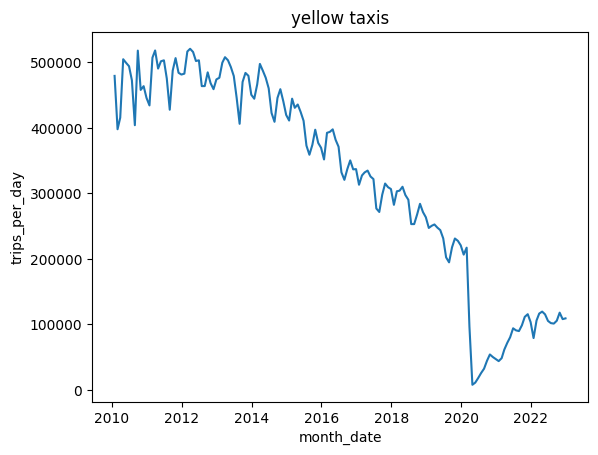

In [586]:
g = sns.lineplot(x=yellow.index,y=yellow['trips_per_day'],data=yellow['trips_per_day']) 
plt.title("yellow taxis")                                          
plt.show(g)  

In [587]:
# yellow.to_csv('yellow.csv')
# yellow = pd.read_csv('yellow.csv',index_col=['month_date'])
# yellow.info()

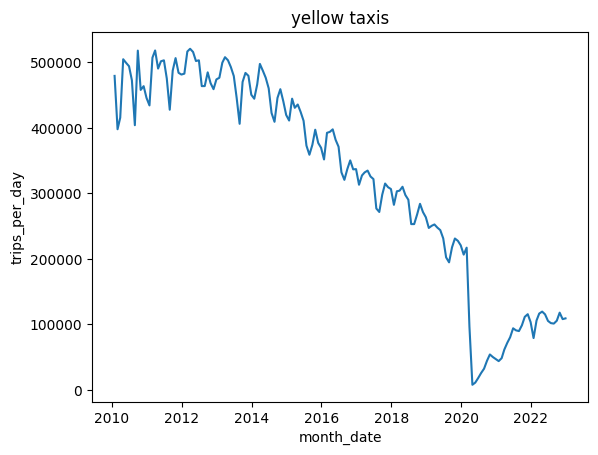

In [588]:
g = sns.lineplot(x=yellow.index,y=yellow['trips_per_day'],data=yellow['trips_per_day']) 
plt.title("yellow taxis")                                          
plt.show(g) 

In [589]:
industry_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 570 to 4
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   license_class                           653 non-null    category      
 1   trips_per_day                           653 non-null    int64         
 2   farebox_per_day                         653 non-null    int64         
 3   unique_drivers                          653 non-null    int64         
 4   unique_vehicles                         653 non-null    int64         
 5   vehicles_per_day                        653 non-null    int64         
 6   avg_days_vehicles_on_road               653 non-null    float64       
 7   avg_hours_per_day_per_vehicle           653 non-null    float64       
 8   avg_days_drivers_on_road                653 non-null    float64       
 9   avg_hours_per_day_per_driver            653 non-null  

In [590]:
# Filtrar las filas donde la columna 'license_class' es igual a 'Green'
green = industry_metrics[industry_metrics['license_class'] == 'Green'].copy()
green = green.set_index('month_date')
green

,license_class,trips_per_day,farebox_per_day,unique_drivers,unique_vehicles,vehicles_per_day,avg_days_vehicles_on_road,avg_hours_per_day_per_vehicle,avg_days_drivers_on_road,avg_hours_per_day_per_driver,...,trips_per_month,farebox_per_month,week,trips_per_week,year,farebox_per_week,total_trips_per_day,shared_trips_per_day_percent,farebox_per_trip,farebox_per_vehicle
month_date,,,,,,,,,,,,,,,,,,,,,
2013-08-28,Green,283,4028,129,114,33,7.3,5.4,6.8,5.1,...,8773,124868,34,1981,2013,28196,283,0.0,14.233216,1095.333333
2013-09-28,Green,1632,23087,478,445,159,10.7,6.3,10.2,6.2,...,48960,692610,38,11424,2013,161609,1632,0.0,14.146446,1556.426966
2013-10-28,Green,5477,74128,1261,1128,500,13.7,6.6,12.8,6.3,...,169787,2297968,43,38339,2013,518896,5477,0.0,13.534417,2037.205674
2013-11-28,Green,12692,168976,2160,1754,1044,17.9,7.1,15.5,6.6,...,380760,5069280,47,88844,2013,1182832,12692,0.0,13.313583,2890.125428
2013-12-28,Green,19435,257398,3317,2736,1707,19.3,6.8,16.9,6.4,...,602485,7979338,51,136045,2013,1801786,19435,0.0,13.244044,2916.424708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-28,Green,2126,38915,962,925,475,16.0,3.5,15.5,3.4,...,65906,1206365,34,14882,2022,272405,2126,0.0,18.304327,1304.178378
2022-09-28,Green,2300,43814,964,928,491,15.9,3.6,15.4,3.5,...,69000,1314420,39,16100,2022,306698,2300,0.0,19.049565,1416.400862
2022-10-28,Green,2236,39960,965,929,485,16.2,3.5,15.8,3.5,...,69316,1238760,43,15652,2022,279720,2236,0.0,17.871199,1333.433800


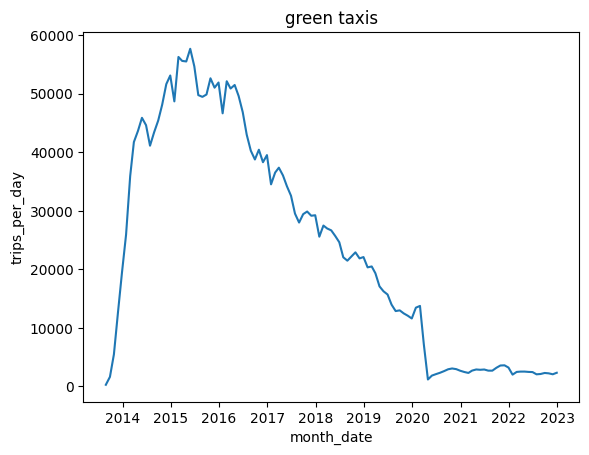

In [591]:
g = sns.lineplot(x=green.index,y=green['trips_per_day'],data=green['trips_per_day']) 
plt.title("green taxis")                                          
plt.show(g) 

In [592]:
green.to_csv('green.csv')
green = pd.read_csv('green.csv',index_col=['month_date'])

In [593]:
# Filtrar las filas donde la columna 'license_class' es igual a 'FHV - High Volume'
FHVHV = industry_metrics[industry_metrics['license_class'] == 'FHV - High Volume'].copy()
FHVHV = FHVHV.set_index('month_date')


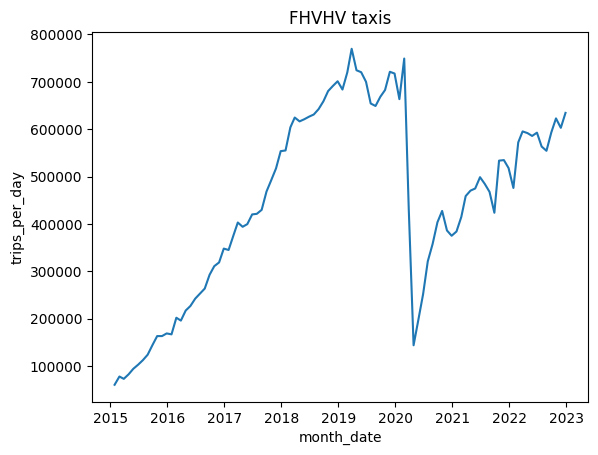

In [594]:
g = sns.lineplot(x=FHVHV.index,y=FHVHV['trips_per_day'],data=FHVHV['trips_per_day']) 
plt.title("FHVHV taxis")                                          
plt.show(g) 

In [595]:
FHVHV.to_csv('FHVHV.csv')
FHVHV = pd.read_csv('FHVHV.csv',index_col=['month_date'])
FHVHV

,license_class,trips_per_day,farebox_per_day,unique_drivers,unique_vehicles,vehicles_per_day,avg_days_vehicles_on_road,avg_hours_per_day_per_vehicle,avg_days_drivers_on_road,avg_hours_per_day_per_driver,...,trips_per_month,farebox_per_month,week,trips_per_week,year,farebox_per_week,total_trips_per_day,shared_trips_per_day_percent,farebox_per_trip,farebox_per_vehicle
month_date,,,,,,,,,,,,,,,,,,,,,
2015-01-28,FHV - High Volume,60357,0,13153,12544,7265,18.0,5.4,17.6,5.3,...,1871067,0,4,422499,2015,0,60357,0.00,0.0,0.0
2015-02-28,FHV - High Volume,77796,0,14180,13531,8402,17.4,5.8,17.1,5.8,...,2178288,0,8,544572,2015,0,77796,0.00,0.0,0.0
2015-03-28,FHV - High Volume,72889,0,14995,14290,8579,18.6,5.5,18.2,5.5,...,2259559,0,12,510223,2015,0,72889,0.00,0.0,0.0
2015-04-28,FHV - High Volume,82498,0,16473,16006,9711,18.2,5.6,17.8,5.5,...,2474940,0,17,577486,2015,0,82498,0.00,0.0,0.0
2015-05-28,FHV - High Volume,94103,0,19076,14122,8120,17.8,5.4,18.0,5.6,...,2917193,0,21,658721,2015,0,94103,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-28,FHV - High Volume,554361,0,72640,70497,46996,20.7,6.5,20.4,6.4,...,17185191,0,34,3880527,2022,0,554827,0.00,0.0,0.0
2022-09-28,FHV - High Volume,593114,0,75194,72616,49980,20.6,6.6,20.3,6.5,...,17793420,0,39,4151798,2022,0,593557,0.00,0.0,0.0
2022-10-28,FHV - High Volume,622770,0,76651,73747,51532,21.7,6.6,21.2,6.5,...,19305870,0,43,4359390,2022,0,626343,0.01,0.0,0.0


In [596]:
# Filtrar las filas donde la columna 'license_class' es igual a 'FHV - High Volume'
FHV = industry_metrics[industry_metrics['license_class'] == 'FHV'].copy()
FHV = FHV.set_index('month_date')

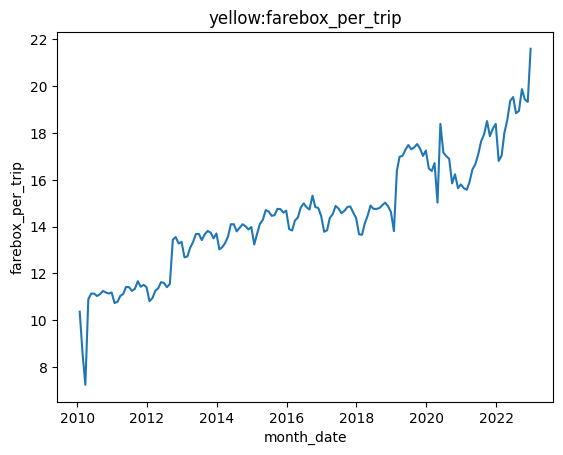

In [597]:
f = sns.lineplot(x=yellow.index,y=yellow['farebox_per_trip'],data=yellow['farebox_per_trip']) 
plt.title("yellow:farebox_per_trip")                                          
plt.show(f) 

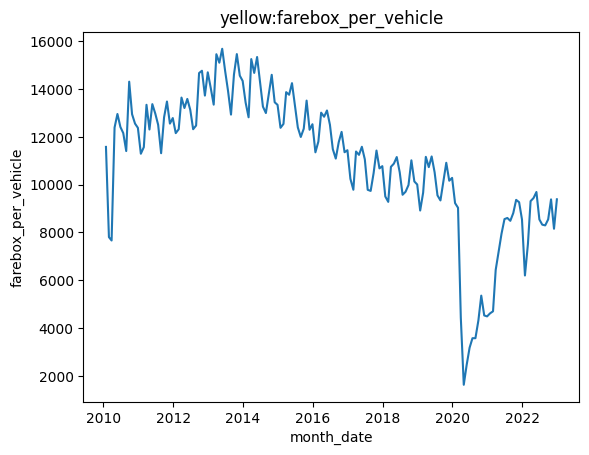

In [598]:
f = sns.lineplot(x=yellow.index,y=yellow['farebox_per_vehicle'],data=yellow['farebox_per_vehicle']) 
plt.title("yellow:monthly_farebox_per_vehicle")                                          
plt.show(f) 

In [46]:
yellow.columns

Index(['license_class', 'trips_per_day', 'farebox_per_day', 'unique_drivers',
       'unique_vehicles', 'vehicles_per_day', 'avg_days_vehicles_on_road',
       'avg_hours_per_day_per_vehicle', 'avg_days_drivers_on_road',
       'avg_hours_per_day_per_driver', 'avg_minutes_per_trip',
       'percent_of_trips_paid_with_credit_card', 'trips_per_day_shared',
       'date', 'month_year1', 'trips_per_month', 'farebox_per_month', 'week',
       'trips_per_week', 'year', 'farebox_per_week', 'total_trips_per_day',
       'shared_trips_per_day_percent', 'farebox_per_trip',
       'farebox_per_vehicle', 'trips_per_month_on_road',
       'farebox_per_month_on_road', 'daily_farebox_per_trip',
       'daily_farebox_per_vehicle'],
      dtype='object')

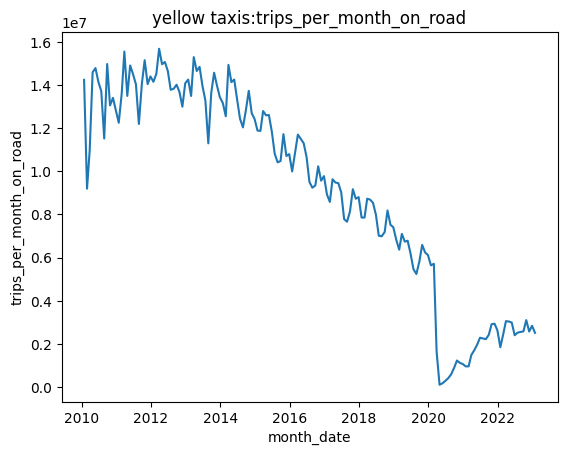

In [34]:
g = sns.lineplot(x=yellow.index,y=yellow['trips_per_month_on_road'],data=yellow['trips_per_month_on_road']) 
plt.title("yellow taxis:trips_per_month_on_road")                                          
plt.show(g)  

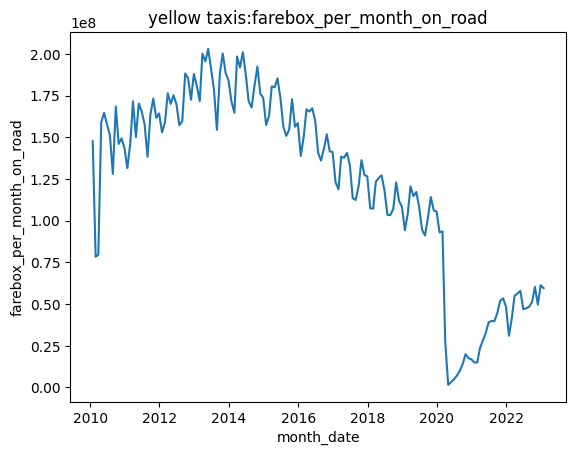

In [36]:
g = sns.lineplot(x=yellow.index,y=yellow['farebox_per_month_on_road'],data=yellow['farebox_per_month_on_road']) 
plt.title("yellow taxis:farebox_per_month_on_road")                                          
plt.show(g)

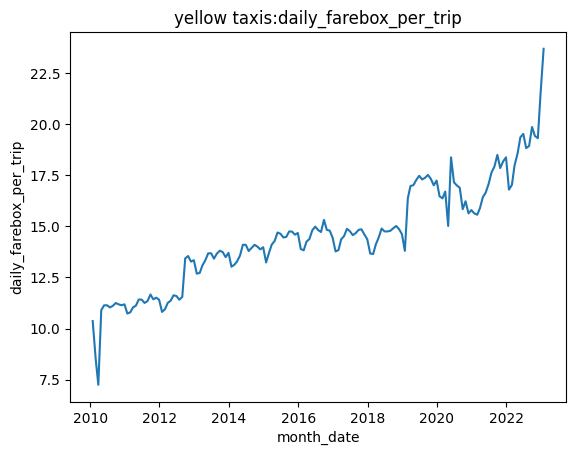

In [40]:
g = sns.lineplot(x=yellow.index,y=yellow['daily_farebox_per_trip'],data=yellow['daily_farebox_per_trip']) 
plt.title("yellow taxis:daily_farebox_per_trip")                                          
plt.show(g)

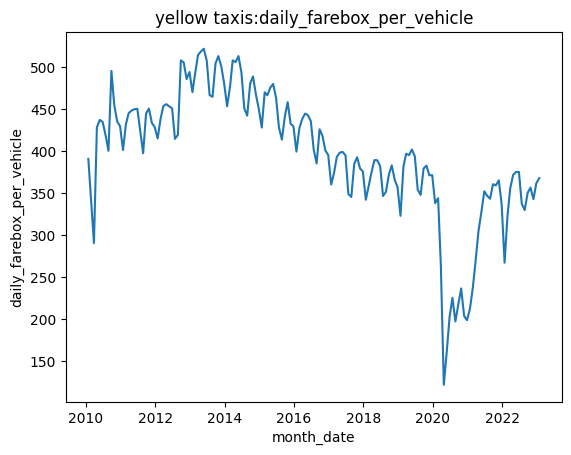

In [38]:
g = sns.lineplot(x=yellow.index,y=yellow['daily_farebox_per_vehicle'],data=yellow['daily_farebox_per_vehicle']) 
plt.title("yellow taxis:daily_farebox_per_vehicle")                                          
plt.show(g)